In [4]:
# Std-lib
import collections
from pathlib import Path
import re
from typing import *

# Third party
import numpy as np
import matplotlib.pyplot as plt

# First party
import data_generation_arithmetic
import script_data_subset_selection

# Increases the resolution of the figures
%config InlineBackend.figure_format = 'retina'

In [ ]:
DATA_FOLDER = Path("data/")
DATA_PATH = DATA_FOLDER / "349_6_6_200000.json.pkl"
SUBSET_PATH = DATA_FOLDER / "subsets/subset_10000_seed_453345_of_349_6_6_50000.json"


dataset, dataset_config = data_generation_arithmetic.load_dataset(None, DATA_PATH)
valid_ds : Dict[int, data_generation_arithmetic.Node] = dataset["eval"]
subset_ids, subset_str = script_data_subset_selection.read_subset_file(DATA_PATH, SUBSET_PATH)
valid_ds_subset = {}
for level, nodes in valid_ds.items(): 
    assert isinstance(level, int)
    valid_ds_subset[level] = [nodes[idx] for idx in subset_ids[level]]
del valid_ds

In [2]:
AGREEMENT_STATS_FILES = [Path("basic_agreement.txt"), Path("oracle_agreement.txt")]


agreement_entries_per_file = collections.defaultdict(list)
for file in AGREEMENT_STATS_FILES:
    with open(file, "r") as f:
        for line in f:
            match = re.match(r"Epoch (\w+) Agreement: (\w+\.\w+)", line.strip())
            if match:
                read_epoch = int(match.group(1))
                assert read_epoch == len(agreement_entries_per_file[file])
                agreement_entries_per_file[file].append(float(match.group(2)))


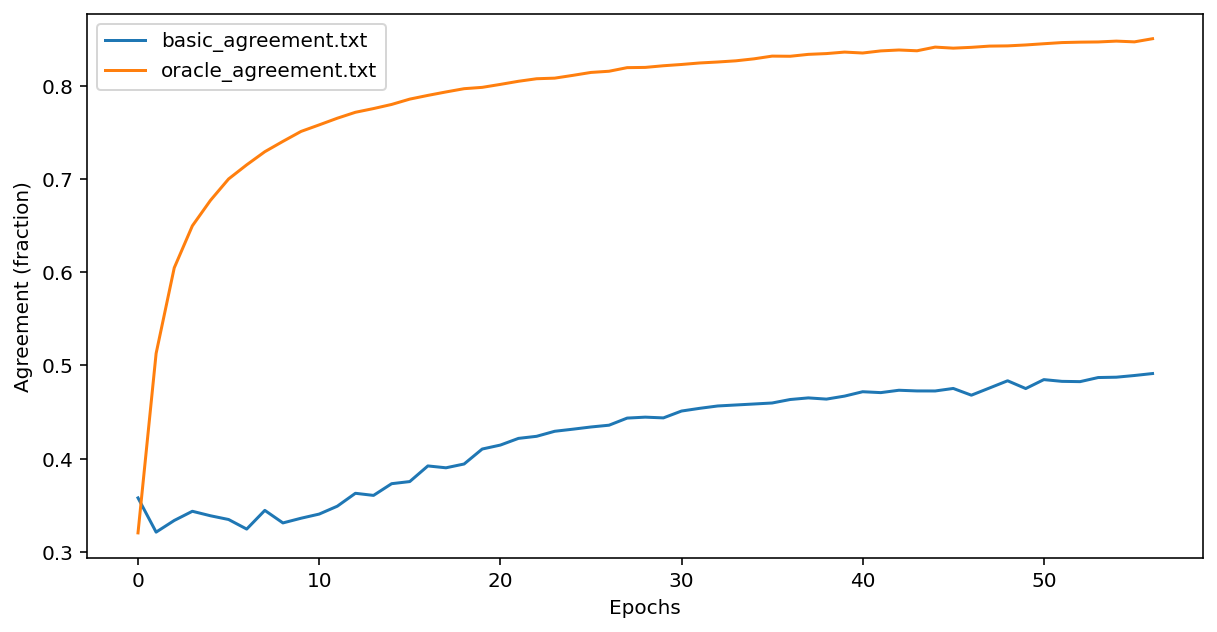

In [7]:
plt.figure(figsize=(10, 5))
for file in AGREEMENT_STATS_FILES:
    plt.plot(agreement_entries_per_file[file], label=str(file))
# add the axis labels
plt.xlabel("Epochs")
plt.ylabel("Agreement (fraction)")
plt.legend();